Milestone_1_Carla_Bradley

Load libraries


In [189]:
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost  import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
import numpy as np 
import pandas as pd 
import folium
import os

import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import gridspec
#import eli5
pd.options.display.float_format = '{:.3f}'.format

Retrieving the Data

In [190]:
#Load dataframe
df = pd.read_csv('/Users/carla/Desktop/PROJECT DSC680 FILES/number-of-deaths-by-risk-factor3b.csv')
continent = pd.read_csv('/Users/carla/Desktop/PROJECT DSC680 FILES/death rates by  continent.csv')

df2 = pd.DataFrame(df)
df=df2
print("Size of Flaredown data or df is",df.shape)
for row in df.iterrows ():
    print (row) 


Size of Flaredown data or df is (5404, 31)
(0, Entity                                                                                    Afghanistan
Code                                                                                              AFG
Year                                                                                             1995
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                           12676.647
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                              9840.849
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)              8770.686
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)      29062.619
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                    5402.660
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                      262.793
Deaths - Child wasting - Sex: Both 

Name: 193, dtype: object)
(194, Entity                                                                                    Antigua and Barbuda
Code                                                                                                      ATG
Year                                                                                                     2008
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                                       0.930
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                                         0.342
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)                         1.586
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)                  1.624
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                               0.279
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                

Name: 411, dtype: object)
(412, Entity                                                                                    Bahrain
Code                                                                                          BHR
Year                                                                                         1996
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                           3.798
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                             1.790
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)             2.208
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)      3.190
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                   1.001
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                    0.107
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                           

Name: 663, dtype: object)
(664, Entity                                                                                    Bolivia
Code                                                                                          BOL
Year                                                                                         2010
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                         480.361
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                           272.442
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)           441.033
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)   1981.230
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                 206.319
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                   10.808
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                           

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




(3748, Entity                                                                                    Papua New Guinea
Code                                                                                                   PNG
Year                                                                                                  1993
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                                 1998.737
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                                   1575.861
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)                   1094.915
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)            5617.426
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                          213.426
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                            23.918
Deaths - Child wasting - Sex:

Name: 3995, dtype: object)
(3996, Entity                                                                                       Russia
Code                                                                                            RUS
Year                                                                                           2010
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                           205.041
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                             175.066
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)             601.712
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)      614.960
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                   256.738
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                     14.480
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)       

Name: 4193, dtype: object)
(4194, Entity                                                                                    Scotland
Code                                                                                           NaN
Year                                                                                          1995
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                            2.044
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                              0.363
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)             22.556
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)     531.937
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                    1.760
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                     0.082
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                

Name: 4414, dtype: object)
(4415, Entity                                                                                    Solomon Islands
Code                                                                                                  SLB
Year                                                                                                 2009
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                                  45.721
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                                    37.430
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)                    27.302
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)            468.517
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                           5.880
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                            0.391
Deaths - Chi

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [191]:
#df.shape
continent.shape

(18, 29)

In [192]:
df3a= pd.read_csv('/Users/carla/Desktop/PROJECT DSC680 FILES/number-with-without-access-to-improved-water.csv')
df3b = pd.DataFrame(df3a)
df3=df3b
print("Size of Flaredown data or df is",df3.shape)
df3

Size of Flaredown data or df is (4974, 4)


Entity  Year  Population without access to improved water source  \
0     Afghanistan  1991                                           10239002    
1     Afghanistan  1992                                           11003229    
2     Afghanistan  1993                                           11864748    
3     Afghanistan  1994                                           12711757    
4     Afghanistan  1995                                           13423140    
...           ...   ...                                                ...    
4969     Zimbabwe  2011                                            3208223    
4970     Zimbabwe  2012                                            3309936    
4971     Zimbabwe  2013                                            3417373    
4972     Zimbabwe  2014                                            3529274    
4973     Zimbabwe  2015                                            3644591    

      Population with access to improved water source  
0                                             2754655  
1                                             2978002  
2                                             3230351  
3                                             3460962  
4                                             3676401  
...                                               ...  
4969                                         11178426  
4970                                         11400890  
4971                                         11637133  
4972                                         11882401  
4973                                         12132860  

[4974 rows x 4 columns]

In [193]:
df3

Entity  Year  Population without access to improved water source  \
0     Afghanistan  1991                                           10239002    
1     Afghanistan  1992                                           11003229    
2     Afghanistan  1993                                           11864748    
3     Afghanistan  1994                                           12711757    
4     Afghanistan  1995                                           13423140    
...           ...   ...                                                ...    
4969     Zimbabwe  2011                                            3208223    
4970     Zimbabwe  2012                                            3309936    
4971     Zimbabwe  2013                                            3417373    
4972     Zimbabwe  2014                                            3529274    
4973     Zimbabwe  2015                                            3644591    

      Population with access to improved water source  
0                                             2754655  
1                                             2978002  
2                                             3230351  
3                                             3460962  
4                                             3676401  
...                                               ...  
4969                                         11178426  
4970                                         11400890  
4971                                         11637133  
4972                                         11882401  
4973                                         12132860  

[4974 rows x 4 columns]

Overview of data


In [194]:
#Display the amount object and variables
df.shape
df.dtypes

Entity                                                                                     object
Code                                                                                       object
Year                                                                                        int64
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                         float64
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                           float64
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)           float64
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)    float64
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                 float64
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                  float64
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                               float64
Deaths - Child stunt

We are clearly dealing with an balance dataset, only one variable 'High total cholesterol' has high percentage of value missing. we will have to deal with this problem  later.
so we give our models a better chance of learning the small details.

In [195]:
#Top  five rows on dataset
display(df.head())
dfb =df


Entity Code  Year  \
0  Afghanistan  AFG  1995   
1  Afghanistan  AFG  1997   
2  Afghanistan  AFG  1996   
3  Afghanistan  AFG  1998   
4  Afghanistan  AFG  1999   

   Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)  \
0                                          12676.647                   
1                                          12329.132                   
2                                          12154.942                   
3                                          12133.610                   
4                                          11990.396                   

   Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)  \
0                                           9840.849                 
1                                           9553.556                 
2                                           9426.896                 
3                                           9390.042                 
4                                           9268.490                 

   Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)  \
0                                           8770.686                                 
1                                           8722.943                                 
2                                           8610.687                                 
3                                           8621.885                                 
4                                           8502.730                                 

   Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)  \
0                                          29062.619                                        
1                                          29674.398                                        
2                                          29407.322                                        
3                                          29807.453                                        
4                                          29484.612                                        

   Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)  \
0                                           5402.660                           
1                                           5271.772                           
2                                           5263.644                           
3                                           5165.924                           
4                                           5044.308                           

   Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)  \
0                                            262.793                          
1                                            258.134                          
2                                            253.668                          
3                                            254.708                          
4                                            251.899                          

   Deaths - Child wasting - Sex: Both - Age: All Ages (Number)  ...  \
0                                          35631.997            ...   
1                                          36749.117            ...   
2                                          36114.593            ...   
3                                          36569.466            ...   
4                                          36124.047            ...   

   Deaths - High body-mass index - Sex: Both - Age: All Ages (Number)  \
0                                           8538.884                    
1                                           8661.863                    
2                                           8614.898                    
3                                           8675.355                    
4                                           8659.273                    

   Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number)  \


In [196]:
#Value_counts groups all the unique instances and gives the count of each of those instances.
display(df.dtypes.value_counts())
display(df.describe())

float64    28
object      2
int64       1
dtype: int64

Year  \
count 5404.000   
mean  2003.500   
std      8.078   
min   1990.000   
25%   1996.750   
50%   2003.500   
75%   2010.250   
max   2017.000   

       Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)  \
count                                           5404.000                   
mean                                           16897.206                   
std                                           129441.530                   
min                                                0.009                   
25%                                                7.187                   
50%                                              121.054                   
75%                                             3090.997                   
max                                          2111659.077                   

       Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)  \
count                                           5404.000                 
mean                                           12509.435                 
std                                            96747.517                 
min                                                0.006                 
25%                                                3.700                 
50%                                               78.551                 
75%                                             2274.754                 
max                                          1638021.199                 

       Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)  \
count                                           5404.000                                 
mean                                            9962.939                                 
std                                            75102.491                                 
min                                                0.078                                 
25%                                               14.762                                 
50%                                              148.234                                 
75%                                             1986.461                                 
max                                          1239519.421                                 

       Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)  \
count                                           5404.000                                        
mean                                           22289.230                                        
std                                           166391.769                                        
min                                                0.021                                        
25%                                               69.578                                        
50%                                              675.731                                        
75%                                             5673.800                                        
max                                          2708904.820                                        

       Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)  \
count                                           5404.000                           
mean                                            3250.973                           
std                                            24625.094                           
min                                                0.004                           
25%                                                3.787                           
50%                                               49.307                           
75%                                              770.246                           
max                                           514102.352                           

       Deaths - Discontinued breastfeeding - Sex: Bot

In [197]:
  # number of unique counts in different parameters
df.nunique()

Entity                                                                                     193
Code                                                                                       188
Year                                                                                        28
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                         5404
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                           5404
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)           5404
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)    5404
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                 5404
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                  5404
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                               5404
Deaths - Child stunting - Sex: Both - Age: All Age

In [198]:
df.describe(include=["O"])

Entity  Code
count           5404  5264
unique           193   188
top     Burkina Faso   MHL
freq              28    28

Data preparation

Variables no related to the analisys were removed 

In [199]:
#Removing 15  columns
df1=df.drop(columns=['Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)',
                     'Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)',
                     'Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)', 
                    'Deaths - Child wasting - Sex: Both - Age: All Ages (Number)','Deaths - Child wasting - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Child stunting - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number)','Deaths - Diet low in fruits - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Diet low in vegetables - Sex: Both - Age: All Ages (Number)',
                    'Deaths - High fasting plasma glucose - Sex: Both - Age: All Ages (Number)','Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Air pollution - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number)',
                    'Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)',
                   'Deaths - High total cholesterol - Sex: Both - Age: All Ages (Number)',
                     'Code'])

list(df1.columns)

['Entity',
 'Year',
 'Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)',
 'Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)',
 'Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)',
 'Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number)',
 'Deaths - Alcohol use - Sex: Both - Age: All Ages (Number)',
 'Deaths - Drug use - Sex: Both - Age: All Ages (Number)',
 'Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number)',
 'Deaths - Low physical activity - Sex: Both - Age: All Ages (Number)',
 'Deaths - High body-mass index - Sex: Both - Age: All Ages (Number)',
 'Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number)',
 'Deaths - Smoking - Sex: Both - Age: All Ages (Number)']

Check for missing data

In [200]:
#count of missing values of the entire dataframe'''
df1.isnull().sum().sum
df3.isnull().sum().sum

<bound method Series.sum of Entity                                                0
Year                                                  0
Population without access to improved water source    0
Population with access to improved water source       0
dtype: int64>

In [201]:
df3

Entity  Year  Population without access to improved water source  \
0     Afghanistan  1991                                           10239002    
1     Afghanistan  1992                                           11003229    
2     Afghanistan  1993                                           11864748    
3     Afghanistan  1994                                           12711757    
4     Afghanistan  1995                                           13423140    
...           ...   ...                                                ...    
4969     Zimbabwe  2011                                            3208223    
4970     Zimbabwe  2012                                            3309936    
4971     Zimbabwe  2013                                            3417373    
4972     Zimbabwe  2014                                            3529274    
4973     Zimbabwe  2015                                            3644591    

      Population with access to improved water source  
0                                             2754655  
1                                             2978002  
2                                             3230351  
3                                             3460962  
4                                             3676401  
...                                               ...  
4969                                         11178426  
4970                                         11400890  
4971                                         11637133  
4972                                         11882401  
4973                                         12132860  

[4974 rows x 4 columns]

In [202]:
#Create a second subset  removing 12  variables  and selecting data for 2017
df__s2 = df1[(df1.Year == 2017)]
df2b = df__s2.drop(columns=['Year'])
df2b.head()


Entity  \
26      Afghanistan   
54          Albania   
83          Algeria   
105  American Samoa   
112         Andorra   

     Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)  \
26                                            5256.649                   
54                                               4.092                   
83                                             189.936                   
105                                              0.720                   
112                                              0.027                   

     Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)  \
26                                            3783.111                 
54                                               1.598                 
83                                              58.911                 
105                                              0.179                 
112                                              0.018                 

     Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)  \
26                                            4156.209                                 
54                                               4.501                                 
83                                             191.730                                 
105                                              0.294                                 
112                                              0.206                                 

     Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number)  \
26                                            5459.173                
54                                             592.116                
83                                            5257.502                
105                                              9.616                
112                                              6.967                

     Deaths - Alcohol use - Sex: Both - Age: All Ages (Number)  \
26                                             631.774           
54                                            1485.351           
83                                             940.808           
105                                              1.760           
112                                             26.794           

     Deaths - Drug use - Sex: Both - Age: All Ages (Number)  \
26                                             862.302        
54                                             141.518        
83                                            2035.224        
105                                              2.167        
112                                              4.997        

     Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number)  \
26                                             805.946          
54                                              57.760          
83                                             955.229          
105                                              1.872          
112                                              1.916          

     Deaths - Low physical activity - Sex: Both - Age: All Ages (Number)  \
26                                            4977.835                     
54                                             632.509                     
83                                            7995.480                     
105                                              8.756                     
112                                             13.823                     

     Deaths - High body-mass index - Sex: Both - Age: All Ages (Number)  \
26                                           19254.958                    
54                                            2635.438                    
83                                           29338.764                    
105                                             77.162                    
112                                      

In [203]:
# Modifying header names 
df1.rename(columns= {'Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)': 'Unsafe water source',\
                         'Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)': 'Poor sanitation',\
                          'Entity':'Country',\
                         'Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)':'No access to handwashing facility',\
                        'Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number)':'Secondhand smoke',\
                        'Deaths - Alcohol use - Sex: Both - Age: All Ages (Number)':' Alcohol use',\
                        'Deaths - Drug use - Sex: Both - Age: All Ages (Number)':'Drug Abuse',\
                        'Deaths - Unsafe sex - Sex: Both - Age: All Ages (Number)':'Unsafe sex',\
                      'Deaths - Low physical activity - Sex: Both - Age: All Ages (Number)':'Low physical activity ',\
                      'Deaths - High body-mass index - Sex: Both - Age: All Ages (Number)':'High body-mass index',\
                      'Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number)':'High blood pressure',\
                      'Deaths - Smoking - Sex: Both - Age: All Ages (Number)':'Smoking'}, \
   
                          inplace=True)
list(df1.columns)

['Country',
 'Year',
 'Unsafe water source',
 'Poor sanitation',
 'No access to handwashing facility',
 'Secondhand smoke',
 ' Alcohol use',
 'Drug Abuse',
 'Unsafe sex',
 'Low physical activity ',
 'High body-mass index',
 'High blood pressure',
 'Smoking']

In [204]:
list(df1.columns)
dfdata = df1
df1=dfdata

In [205]:
dfdata

Country  Year  Unsafe water source  Poor sanitation  \
0     Afghanistan  1995            12676.647         9840.849   
1     Afghanistan  1997            12329.132         9553.556   
2     Afghanistan  1996            12154.942         9426.896   
3     Afghanistan  1998            12133.610         9390.042   
4     Afghanistan  1999            11990.396         9268.490   
...           ...   ...                  ...              ...   
5399     Zimbabwe  1993             3159.082         2223.528   
5400     Zimbabwe  1994             3041.717         2151.996   
5401     Zimbabwe  1992             2832.293         1977.572   
5402     Zimbabwe  1991             2632.995         1825.749   
5403     Zimbabwe  1990             2599.725         1794.031   

      No access to handwashing facility  Secondhand smoke   Alcohol use  \
0                              8770.686          5491.018       220.199   
1                              8722.943          5701.812       181.674   
2                              8610.687          5595.951       197.928   
3                              8621.885          5762.015       203.520   
4                              8502.730          5774.820       170.006   
...                                 ...               ...           ...   
5399                           2500.170          1129.301      3067.592   
5400                           2451.129          1143.874      3267.656   
5401                           2344.133          1132.532      2981.772   
5402                           2259.639          1141.680      2973.645   
5403                           2288.078          1187.195      3135.399   

      Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
0        324.610     476.424                4613.790              8538.884   
1        361.935     497.552                4720.934              8661.863   
2        342.851     486.552                4668.633              8614.898   
3        379.105     506.943                4759.521              8675.355   
4        388.734     513.468                4793.343              8659.273   
...          ...         ...                     ...                   ...   
5399     996.323   43387.466                 433.010              2275.139   
5400    1186.324   52265.445                 452.582              2384.609   
5401     820.553   34579.470                 418.539              2198.689   
5402     661.802   26345.558                 405.449              2130.008   
5403     534.619   19103.146                 408.114              2139.924   

      High blood pressure  Smoking  
0               31152.181 6946.956  
1               31957.261 7155.470  
2               31554.000 7040.421  
3               32267.853 7266.192  
4               32476.062 7356.558  
...                   ...      ...  
5399             5550.933 4943.197  
5400             5770.349 5261.222  
5401             5395.927 4719.834  
5402             5255.333 4556.213  
5403             5317.750 4616.490  

[5404 rows x 13 columns]

In [206]:
#Create a subset
df2= df1[['Country','Year','Unsafe water source','Poor sanitation','No access to handwashing facility']]
dfb=df2

list(dfb.columns)

['Country',
 'Year',
 'Unsafe water source',
 'Poor sanitation',
 'No access to handwashing facility']

In [207]:
#missing values
df.isnull().sum()

Entity                                                                                       0
Code                                                                                       140
Year                                                                                         0
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                            0
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                              0
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)              0
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)       0
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                    0
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                     0
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                                  0
Deaths - Child stunting - Sex: Both - Age: All Age

In [208]:
#Subset  data frame by year 2015 and  Variable - country- world 
df_1990 = df1[(df1.Year == 1990) &(df1.Country=='World')]
df_2015 = df1[(df1.Year == 2015) &(df1.Country=='World')]
df_2016 = df1[(df1.Year == 2016) &(df1.Country=='World')]
df_2017 = df1[(df1.Year == 2017) &(df1.Country=='World')]

#Subset  data frame by year 1990-2015-2016-2017
dff_1990 =df1[df1.Year == 1990]
dff_2015= df1[df1.Year == 2015]
dff_2016 =df1[df1.Year == 2016]
dff_2017 =df1[df1.Year == 2017]

In [209]:
# Added df1_world variable to the line below
df1_world=df1[df1.Country=='World']
#df1['Unsafe water source']
df1_world

Country  Year  Unsafe water source  Poor sanitation  \
5292   World  1990          2111659.077      1638021.199   
5293   World  1991          2095066.505      1622958.940   
5294   World  1992          2053362.286      1588275.164   
5295   World  1993          2013224.699      1553936.146   
5296   World  1994          1973406.044      1519967.074   
5297   World  1995          1931065.508      1484244.305   
5298   World  1996          1877778.830      1440235.417   
5299   World  1997          1840394.520      1409441.510   
5300   World  1998          1808119.007      1382608.295   
5301   World  1999          1766645.451      1347957.663   
5302   World  2000          1727905.469      1315192.214   
5303   World  2001          1682357.015      1277426.292   
5304   World  2002          1638128.167      1240534.972   
5305   World  2003          1596385.848      1205163.982   
5306   World  2004          1561987.644      1174027.895   
5307   World  2005          1536826.824      1149262.178   
5308   World  2006          1523674.684      1132528.956   
5309   World  2007          1503844.158      1109838.767   
5310   World  2008          1491461.978      1089920.305   
5311   World  2009          1489789.499      1077637.575   
5312   World  2010          1483731.657      1061903.157   
5313   World  2011          1431184.379      1012279.945   
5314   World  2012          1374545.908       957813.206   
5315   World  2013          1322082.215       902564.811   
5316   World  2014          1282539.799       854076.142   
5317   World  2015          1245322.727       810246.017   
5318   World  2017          1232368.284       774240.986   
5319   World  2016          1220145.311       779071.607   

      No access to handwashing facility  Secondhand smoke   Alcohol use  \
5292                        1239519.421       1247230.879   1800478.308   
5293                        1230318.626       1251918.229   1864042.538   
5294                        1209423.879       1255581.160   1939783.304   
5295                        1188248.169       1260815.712   2025045.603   
5296                        1167209.347       1260994.206   2097212.994   
5297                        1144503.939       1253577.032   2144887.033   
5298                        1116519.757       1241763.527   2168153.976   
5299                        1096678.272       1232722.030   2199073.322   
5300                        1077689.327       1218980.197   2236838.890   
5301                        1052547.258       1204890.482   2292873.113   
5302                        1030042.304       1195523.541   2349425.559   
5303                        1003459.771       1183889.971   2385905.324   
5304                         976805.530       1178246.291   2443612.781   
5305                         951759.784       1171247.834   2494699.766   
5306                         930329.499       1152014.441   2518388.904   
5307                         914399.905       1141569.517   2562559.799   
5308                         905364.365       1117579.421   2544467.646   
5309                         891831.907       1107576.361   2562325.476   
5310                         879853.233       1110817.943   2621392.287   
5311                         873667.455       1115495.907   2628366.750   
5312                         865051.682       1126799.656   2677117.845   
5313                         835307.521       1134562.113   2652024.866   
5314                         804331.610       1141945.310   2667932.256   
5315                         773606.808       1144785.279   2673153.393   
5316                         748144.007       1164110.806   2706466.692   
5317                         725483.971       1191774.354   2773307.329   
5318                         707247.713       1220044.162   2842854.196   
5319                         709112.685       1209977.188   2817609.639   

      Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
5292  2508

In [210]:
df1_world_by_year = df1_world.drop('Country', axis=1)
df1_world_by_year

Year  Unsafe water source  Poor sanitation  \
5292  1990          2111659.077      1638021.199   
5293  1991          2095066.505      1622958.940   
5294  1992          2053362.286      1588275.164   
5295  1993          2013224.699      1553936.146   
5296  1994          1973406.044      1519967.074   
5297  1995          1931065.508      1484244.305   
5298  1996          1877778.830      1440235.417   
5299  1997          1840394.520      1409441.510   
5300  1998          1808119.007      1382608.295   
5301  1999          1766645.451      1347957.663   
5302  2000          1727905.469      1315192.214   
5303  2001          1682357.015      1277426.292   
5304  2002          1638128.167      1240534.972   
5305  2003          1596385.848      1205163.982   
5306  2004          1561987.644      1174027.895   
5307  2005          1536826.824      1149262.178   
5308  2006          1523674.684      1132528.956   
5309  2007          1503844.158      1109838.767   
5310  2008          1491461.978      1089920.305   
5311  2009          1489789.499      1077637.575   
5312  2010          1483731.657      1061903.157   
5313  2011          1431184.379      1012279.945   
5314  2012          1374545.908       957813.206   
5315  2013          1322082.215       902564.811   
5316  2014          1282539.799       854076.142   
5317  2015          1245322.727       810246.017   
5318  2017          1232368.284       774240.986   
5319  2016          1220145.311       779071.607   

      No access to handwashing facility  Secondhand smoke   Alcohol use  \
5292                        1239519.421       1247230.879   1800478.308   
5293                        1230318.626       1251918.229   1864042.538   
5294                        1209423.879       1255581.160   1939783.304   
5295                        1188248.169       1260815.712   2025045.603   
5296                        1167209.347       1260994.206   2097212.994   
5297                        1144503.939       1253577.032   2144887.033   
5298                        1116519.757       1241763.527   2168153.976   
5299                        1096678.272       1232722.030   2199073.322   
5300                        1077689.327       1218980.197   2236838.890   
5301                        1052547.258       1204890.482   2292873.113   
5302                        1030042.304       1195523.541   2349425.559   
5303                        1003459.771       1183889.971   2385905.324   
5304                         976805.530       1178246.291   2443612.781   
5305                         951759.784       1171247.834   2494699.766   
5306                         930329.499       1152014.441   2518388.904   
5307                         914399.905       1141569.517   2562559.799   
5308                         905364.365       1117579.421   2544467.646   
5309                         891831.907       1107576.361   2562325.476   
5310                         879853.233       1110817.943   2621392.287   
5311                         873667.455       1115495.907   2628366.750   
5312                         865051.682       1126799.656   2677117.845   
5313                         835307.521       1134562.113   2652024.866   
5314                         804331.610       1141945.310   2667932.256   
5315                         773606.808       1144785.279   2673153.393   
5316                         748144.007       1164110.806   2706466.692   
5317                         725483.971       1191774.354   2773307.329   
5318                         707247.713       1220044.162   2842854.196   
5319                         709112.685       1209977.188   2817609.639   

      Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
5292  250864.676  461671.848              842665.579           2159329.452   
5293  267682.947  534031.975              853210.758           2222986.643   
5294  287034.814  618562.174              867723.886           2303362.649   
5295  306

<AxesSubplot:>

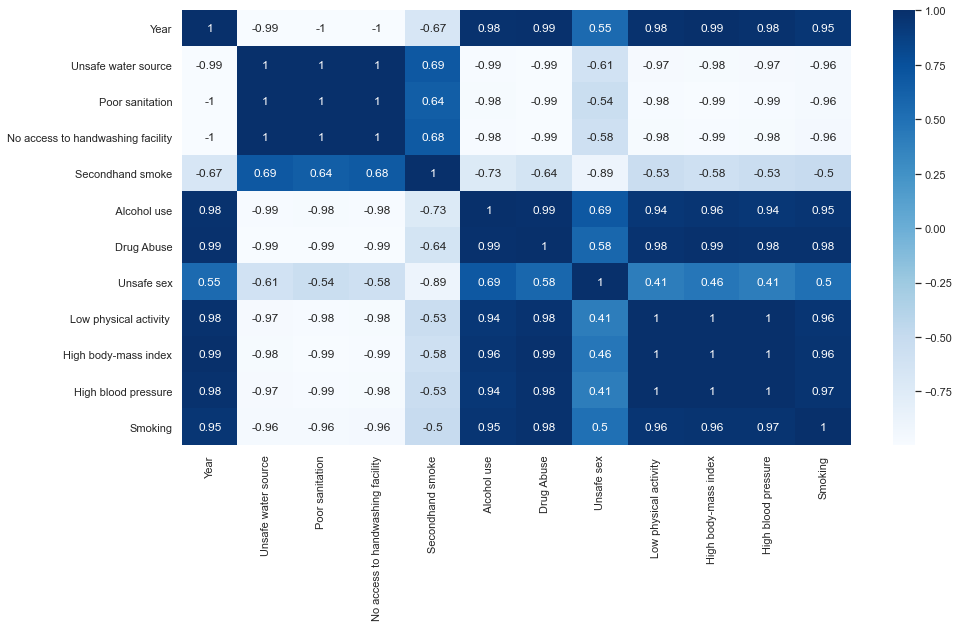

In [211]:
corr = df1_world.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap='Blues',
           annot=True)



In [212]:
df1_world_by_year['id2'] = df1_world_by_year.index
df1_world_by_year.set_index('Year',inplace=True)



In [213]:
#data set of world data by year and death cause
df1_world_by_year = df1_world_by_year.transpose()
df1_world_by_year

Year                                     1990        1991        1992  \
Unsafe water source               2111659.077 2095066.505 2053362.286   
Poor sanitation                   1638021.199 1622958.940 1588275.164   
No access to handwashing facility 1239519.421 1230318.626 1209423.879   
Secondhand smoke                  1247230.879 1251918.229 1255581.160   
 Alcohol use                      1800478.308 1864042.538 1939783.304   
Drug Abuse                         250864.676  267682.947  287034.814   
Unsafe sex                         461671.848  534031.975  618562.174   
Low physical activity              842665.579  853210.758  867723.886   
High body-mass index              2159329.452 2222986.643 2303362.649   
High blood pressure               6884458.978 6988580.174 7115388.804   
Smoking                           5681577.793 5769043.287 5869243.876   
id2                                  5292.000    5293.000    5294.000   

Year                                     1993        1994        1995  \
Unsafe water source               2013224.699 1973406.044 1931065.508   
Poor sanitation                   1553936.146 1519967.074 1484244.305   
No access to handwashing facility 1188248.169 1167209.347 1144503.939   
Secondhand smoke                  1260815.712 1260994.206 1253577.032   
 Alcohol use                      2025045.603 2097212.994 2144887.033   
Drug Abuse                         306575.951  325420.824  342556.716   
Unsafe sex                         709085.836  805607.252  903917.141   
Low physical activity              897760.837  914048.173  919262.556   
High body-mass index              2428019.231 2524269.751 2586034.531   
High blood pressure               7329202.966 7469316.400 7537548.158   
Smoking                           6023154.990 6115916.982 6170797.452   
id2                                  5295.000    5296.000    5297.000   

Year                                     1996        1997        1998  \
Unsafe water source               1877778.830 1840394.520 1808119.007   
Poor sanitation                   1440235.417 1409441.510 1382608.295   
No access to handwashing facility 1116519.757 1096678.272 1077689.327   
Secondhand smoke                  1241763.527 1232722.030 1218980.197   
 Alcohol use                      2168153.976 2199073.322 2236838.890   
Drug Abuse                         353115.840  361142.997  372086.704   
Unsafe sex                         992796.206 1076179.048 1175637.032   
Low physical activity              917587.227  919434.129  924224.279   
High body-mass index              2632155.462 2688066.122 2754377.071   
High blood pressure               7568246.535 7626124.418 7688173.701   
Smoking                           6180919.478 6208120.345 6244660.280   
id2                                  5298.000    5299.000    5300.000   

Year                                     1999  ...        2008        2009  \
Unsafe water source               1766645.451  ... 1491461.978 1489789.499   
Poor sanitation                   1347957.663  ... 1089920.305 1077637.575   
No access to handwashing facility 1052547.258  ...  879853.233  873667.455   
Secondhand smoke                  1204890.482  ... 1110817.943 1115495.907   
 Alcohol use                      2292873.113  ... 2621392.287 2628366.750   
Drug Abuse                         386344.769  ...  467883.403  474179.758   
Unsafe sex                        1287095.166  ... 1703043.841 1650365.441   
Low physical activity              940794.667  ... 1059395.939 1077823.426   
High body-mass index              2860457.523  ... 3586561.415 3688360.783   
High blood pressure               7817683.344  ... 8699254.174 8863423.503   
Smoking                           6298194.798  ... 6447767.153 6495294.182   
id2                                  5301.000  ...    5310.000    5311.000   

Year                                     2010        2011        2012  \
Unsafe water source               1483731.657 1431184.379 1374

In [214]:

world_2015 = df1_world[df1_world['Year']==2015]
world_2015_num = world_2015.iloc[:,1:]
world_2015_num = world_2015_num.astype(int)
world_2015_num

Year  Unsafe water source  Poor sanitation  \
5317  2015              1245322           810246   

      No access to handwashing facility  Secondhand smoke   Alcohol use  \
5317                             725483           1191774       2773307   

      Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
5317      549156     1158737                 1215129               4462996   

      High blood pressure  Smoking  
5317             10070692  6936294

<AxesSubplot:xlabel='Year', ylabel='Year'>

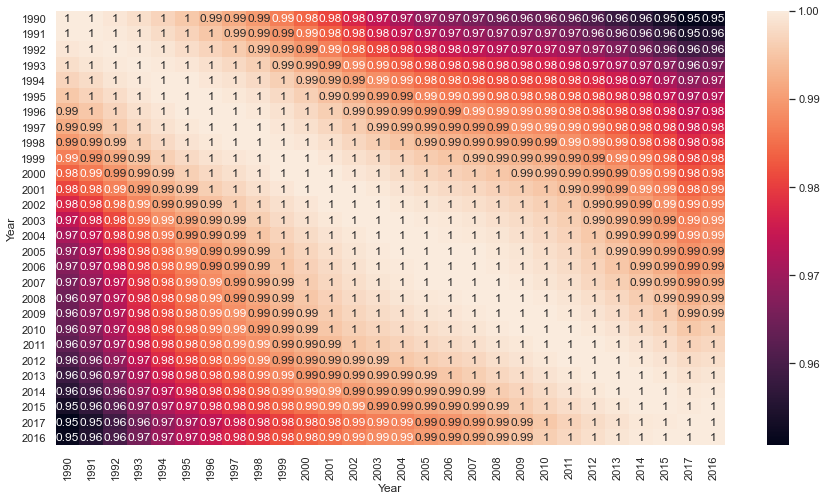

In [215]:

corr = df1_world_by_year.corr()

# plot the heatmap
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

In [216]:
# Create data subset for World in year 2017
hgraphdf = df1[(df1.Country=='World') & (df1.Year==2017)]
hgraphdf
hgraphdf.dtypes

Country                               object
Year                                   int64
Unsafe water source                  float64
Poor sanitation                      float64
No access to handwashing facility    float64
Secondhand smoke                     float64
 Alcohol use                         float64
Drug Abuse                           float64
Unsafe sex                           float64
Low physical activity                float64
High body-mass index                 float64
High blood pressure                  float64
Smoking                              float64
dtype: object

In [217]:
#data set reflect  the world highest Index of Deaths of Unsafe Water Source.
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=[float(hgraphdf['Unsafe water source']),\
               float(hgraphdf['Poor sanitation']),\
               float(hgraphdf['No access to handwashing facility']),\
               float(hgraphdf['Secondhand smoke']),\
               float(hgraphdf[' Alcohol use']),\
               #float(hgraphdf['Drug Abuse']),\
               float(hgraphdf['Unsafe sex']),\
               float(hgraphdf['Low physical activity ']),\
               float(hgraphdf['High body-mass index']),\
              float(hgraphdf['High blood pressure']),\
              float(hgraphdf['Smoking'])],
            y=['Unsafe water source',
 'Poor sanitation',
 'No access to handwashing facility',
 'Secondhand smoke',
# 'Drug Abuse',
 'Unsafe sex',
 'Low physical activity ',
 'High body-mass index',
 'High blood pressure',
 'Smoking'],
            orientation='h'))

fig.show()

In [218]:
#Displays compare the margen of death in the world for year  1990 - for deaths  - Unsafe sanitation,  No access to handwashing facility, and Unsafe water source

#y=df.Price
x=range(1, 3)
y1= df_1990['Poor sanitation']
y3= df_1990['Unsafe water source']
y2= df_1990['No access to handwashing facility']


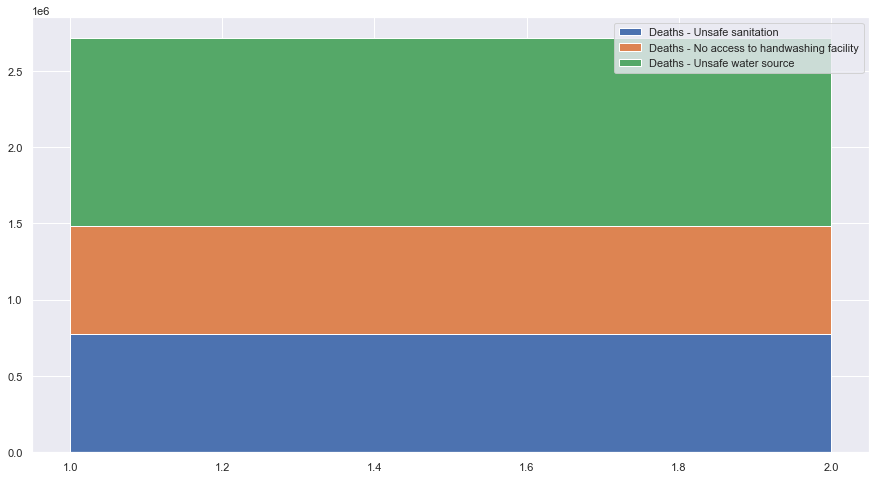

In [219]:
# Stacked area chart - 'Deaths - Unsafe sanitation','Deaths - No access to handwashing facility','Deaths - Unsafe water source']

x=range(1, 3)
y1= df_2017['Poor sanitation']
y3= df_2017['Unsafe water source']
y2= df_2017['No access to handwashing facility']

#Displays compare the margen of death in the world for year  2015 - for deaths  - Unsafe sanitation,  No access to handwashing facility, and Unsafe water source
#Basic stacked area chart.
plt.stackplot(x, y1, y2, y3, labels=['Deaths - Unsafe sanitation','Deaths - No access to handwashing facility','Deaths - Unsafe water source'])
plt.legend(loc='upper right')
plt.show()

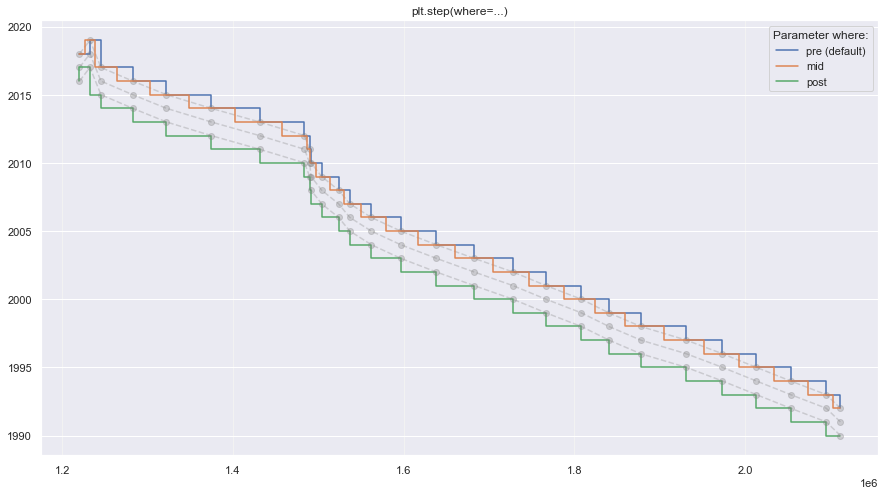

In [220]:
#Step chart using Python -Deaths – Water Pollution 1990-2017

df_us = df1[df1.Country=='World']
y = df_us['Year']
x= df_us['Unsafe water source']

plt.step(x, y + 2, label='pre (default)')
plt.plot(x, y + 2, 'o--', color='grey', alpha=0.3)

plt.step(x, y + 2, where='mid', label='mid')
plt.plot(x, y + 1, 'o--', color='grey', alpha=0.3)

plt.step(x, y, where='post', label='post')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')
plt.show()

Data Cleaning  and Preparation

In [221]:
#rows containing duplicates
duplicate_rows =df1[df.duplicated()]
print('Number  of duplicate rows:', duplicate_rows.shape)


Number  of duplicate rows: (0, 13)


In [222]:
#finding the null values
print(df1.isnull().sum())

Country                              0
Year                                 0
Unsafe water source                  0
Poor sanitation                      0
No access to handwashing facility    0
Secondhand smoke                     0
 Alcohol use                         0
Drug Abuse                           0
Unsafe sex                           0
Low physical activity                0
High body-mass index                 0
High blood pressure                  0
Smoking                              0
dtype: int64


In [223]:
#summarize the central tendency, dispersion and shape of a dataset’s distribution
df1.describe()

Year  Unsafe water source  Poor sanitation  \
count 5404.000             5404.000         5404.000   
mean  2003.500            16897.206        12509.435   
std      8.078           129441.530        96747.517   
min   1990.000                0.009            0.006   
25%   1996.750                7.187            3.700   
50%   2003.500              121.054           78.551   
75%   2010.250             3090.997         2274.754   
max   2017.000          2111659.077      1638021.199   

       No access to handwashing facility  Secondhand smoke   Alcohol use  \
count                           5404.000          5404.000      5404.000   
mean                            9962.939         12354.887     25116.393   
std                            75102.491         90294.242    181454.648   
min                                0.078             4.529     -2315.345   
25%                               14.762           224.325       233.344   
50%                              148.234           953.328      1791.513   
75%                             1986.461          3095.462      6860.890   
max                          1239519.421       1260994.206   2842854.196   

       Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
count    5404.000    5404.000                5404.000              5404.000   
mean     4404.453   12396.386               10785.295             34822.729   
std     32284.214   95930.959               75453.104            246677.033   
min         1.240       1.022                   4.947                21.092   
25%        70.550     116.547                 203.865               916.035   
50%       325.883     545.182                 869.433              3519.527   
75%      1090.786    3146.639                3787.544             11490.660   
max    585348.180 1771140.671             1263051.288           4724346.293   

       High blood pressure     Smoking  
count             5404.000    5404.000  
mean             88258.006   67291.340  
std             626578.057  479717.600  
min                 44.484      22.704  
25%               1973.764     901.718  
50%               8513.297    4359.460  
75%              27967.354   16227.656  
max           10440818.480 7099111.294

<Figure size 1800x1080 with 0 Axes>

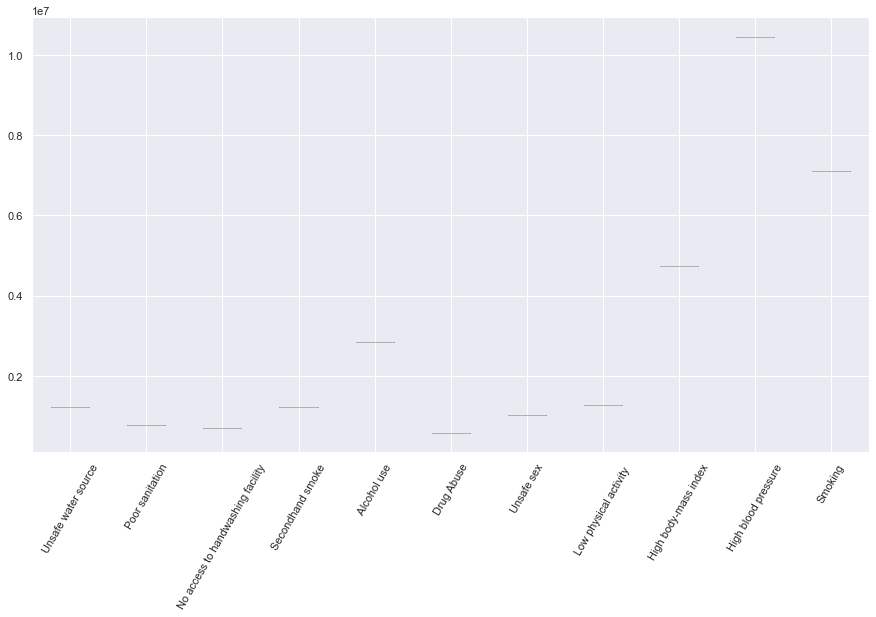

<Figure size 1800x1080 with 0 Axes>

In [224]:
#Plot identify World's highest causes of deaths in year 2017
plotw = df1[(df1.Country=='World') & (df1.Year==2017)]
plotw2=plotw.drop(columns=['Year'])
plot_f =plotw2
plot_f.boxplot()
plt.xticks(rotation=60)
plt.figure(figsize=(25,15))

In [225]:
#Create a dataset for trainng- 
y=df3.drop(columns=['Population with access to improved water source','Entity','Year'])


In [226]:
list(df1.columns)

['Country',
 'Year',
 'Unsafe water source',
 'Poor sanitation',
 'No access to handwashing facility',
 'Secondhand smoke',
 ' Alcohol use',
 'Drug Abuse',
 'Unsafe sex',
 'Low physical activity ',
 'High body-mass index',
 'High blood pressure',
 'Smoking']

In [227]:
#df_jn3 = y.drop(columns=['Country'])
#df_jn3

In [228]:
df1['new_col'] = y['Population without access to improved water source'].astype(int)

In [229]:
df1

Country  Year  Unsafe water source  Poor sanitation  \
0     Afghanistan  1995            12676.647         9840.849   
1     Afghanistan  1997            12329.132         9553.556   
2     Afghanistan  1996            12154.942         9426.896   
3     Afghanistan  1998            12133.610         9390.042   
4     Afghanistan  1999            11990.396         9268.490   
...           ...   ...                  ...              ...   
5399     Zimbabwe  1993             3159.082         2223.528   
5400     Zimbabwe  1994             3041.717         2151.996   
5401     Zimbabwe  1992             2832.293         1977.572   
5402     Zimbabwe  1991             2632.995         1825.749   
5403     Zimbabwe  1990             2599.725         1794.031   

      No access to handwashing facility  Secondhand smoke   Alcohol use  \
0                              8770.686          5491.018       220.199   
1                              8722.943          5701.812       181.674   
2                              8610.687          5595.951       197.928   
3                              8621.885          5762.015       203.520   
4                              8502.730          5774.820       170.006   
...                                 ...               ...           ...   
5399                           2500.170          1129.301      3067.592   
5400                           2451.129          1143.874      3267.656   
5401                           2344.133          1132.532      2981.772   
5402                           2259.639          1141.680      2973.645   
5403                           2288.078          1187.195      3135.399   

      Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
0        324.610     476.424                4613.790              8538.884   
1        361.935     497.552                4720.934              8661.863   
2        342.851     486.552                4668.633              8614.898   
3        379.105     506.943                4759.521              8675.355   
4        388.734     513.468                4793.343              8659.273   
...          ...         ...                     ...                   ...   
5399     996.323   43387.466                 433.010              2275.139   
5400    1186.324   52265.445                 452.582              2384.609   
5401     820.553   34579.470                 418.539              2198.689   
5402     661.802   26345.558                 405.449              2130.008   
5403     534.619   19103.146                 408.114              2139.924   

      High blood pressure  Smoking      new_col  
0               31152.181 6946.956 10239002.000  
1               31957.261 7155.470 11003229.000  
2               31554.000 7040.421 11864748.000  
3               32267.853 7266.192 12711757.000  
4               32476.062 7356.558 13423140.000  
...                   ...      ...          ...  
5399             5550.933 4943.197          nan  
5400             5770.349 5261.222          nan  
5401             5395.927 4719.834          nan  
5402             5255.333 4556.213          nan  
5403             5317.750 4616.490          nan  

[5404 rows x 14 columns]

In [230]:
df1.isnull().sum().sum()

430

In [231]:
df1.tail(411)

Country  Year  Unsafe water source  Poor sanitation  \
4993    Uganda  1999            13830.617        10717.192   
4994    Uganda  2000            13218.597        10240.719   
4995    Uganda  2001            13020.146        10090.613   
4996    Uganda  2002            12608.830         9773.526   
4997    Uganda  2003            11806.606         9156.644   
...        ...   ...                  ...              ...   
5399  Zimbabwe  1993             3159.082         2223.528   
5400  Zimbabwe  1994             3041.717         2151.996   
5401  Zimbabwe  1992             2832.293         1977.572   
5402  Zimbabwe  1991             2632.995         1825.749   
5403  Zimbabwe  1990             2599.725         1794.031   

      No access to handwashing facility  Secondhand smoke   Alcohol use  \
4993                          10164.126          1355.663     11914.760   
4994                           9842.572          1367.494     12682.621   
4995                           9857.325          1411.144     13102.922   
4996                           9644.079          1407.569     13271.889   
4997                           9151.831          1376.039     13257.620   
...                                 ...               ...           ...   
5399                           2500.170          1129.301      3067.592   
5400                           2451.129          1143.874      3267.656   
5401                           2344.133          1132.532      2981.772   
5402                           2259.639          1141.680      2973.645   
5403                           2288.078          1187.195      3135.399   

      Drug Abuse  Unsafe sex  Low physical activity   High body-mass index  \
4993     404.168   73230.436                 735.458              2584.052   
4994     404.547   71854.828                 755.848              2740.229   
4995     401.825   70168.863                 775.271              2909.491   
4996     392.608   68192.588                 786.599              3049.249   
4997     383.784   66423.994                 793.015              3171.295   
...          ...         ...                     ...                   ...   
5399     996.323   43387.466                 433.010              2275.139   
5400    1186.324   52265.445                 452.582              2384.609   
5401     820.553   34579.470                 418.539              2198.689   
5402     661.802   26345.558                 405.449              2130.008   
5403     534.619   19103.146                 408.114              2139.924   

      High blood pressure  Smoking  new_col  
4993            13844.276 4587.569      nan  
4994            13992.897 4777.753      nan  
4995            14180.806 4967.050      nan  
4996            14223.891 5074.660      nan  
4997            14192.807 5131.521      nan  
...                   ...      ...      ...  
5399             5550.933 4943.197      nan  
5400             5770.349 5261.222      nan  
5401             5395.927 4719.834      nan  
5402             5255.333 4556.213      nan  
5403             5317.750 4616.490      nan  

[411 rows x 14 columns]

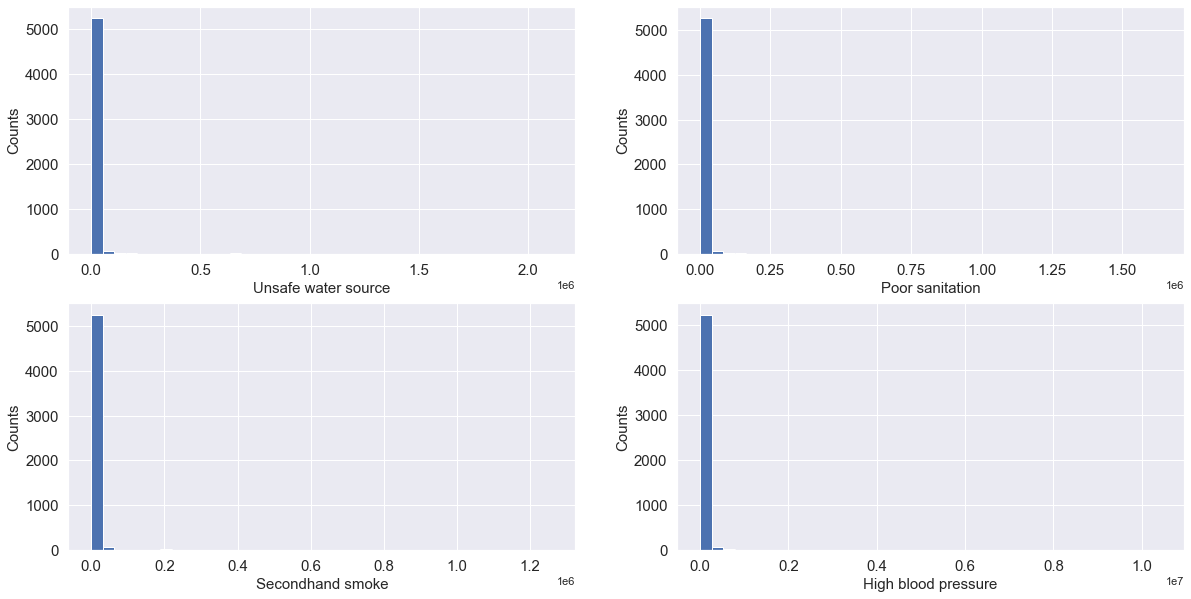

In [232]:

import matplotlib.pyplot as plt

# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Specify the features of interest
num_features = ['Unsafe water source','Poor sanitation','Secondhand smoke','High blood pressure']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df1[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=15)
    ax.set_ylabel(yaxes[idx], fontsize=15)
    ax.tick_params(axis='both', labelsize=15)
#plt.show()


In [238]:
df1=df1.drop(columns=['Country','Year'])
df1

Unsafe water source  Poor sanitation  No access to handwashing facility  \
0               12676.647         9840.849                           8770.686   
1               12329.132         9553.556                           8722.943   
2               12154.942         9426.896                           8610.687   
3               12133.610         9390.042                           8621.885   
4               11990.396         9268.490                           8502.730   
...                   ...              ...                                ...   
4969              276.473          233.666                            171.547   
4970              235.270          198.215                            154.138   
4971              209.068          175.614                            140.471   
4972              182.356          152.600                            129.152   
4973              161.876          135.174                            118.958   

      Secondhand smoke   Alcohol use  Drug Abuse  Unsafe sex  \
0             5491.018       220.199     324.610     476.424   
1             5701.812       181.674     361.935     497.552   
2             5595.951       197.928     342.851     486.552   
3             5762.015       203.520     379.105     506.943   
4             5774.820       170.006     388.734     513.468   
...                ...           ...         ...         ...   
4969          1141.982      1668.128     364.087     139.053   
4970          1176.909      1828.944     395.600     155.460   
4971          1210.002      1985.508     432.889     171.491   
4972          1204.111      2032.233     441.243     178.668   
4973          1173.799      2009.810     452.925     184.701   

      Low physical activity   High body-mass index  High blood pressure  \
0                   4613.790              8538.884            31152.181   
1                   4720.934              8661.863            31957.261   
2                   4668.633              8614.898            31554.000   
3                   4759.521              8675.355            32267.853   
4                   4793.343              8659.273            32476.062   
...                      ...                   ...                  ...   
4969                 903.773              4381.978             9099.271   
4970                 956.763              4720.390             9792.842   
4971                1004.132              5039.659            10432.277   
4972                1009.432              5133.950            10574.994   
4973                 992.074              5091.822            10438.122   

      Smoking  Population without access to improved water source  
0    6946.956                                       10239002.000   
1    7155.470                                       11003229.000   
2    7040.421                                       11864748.000   
3    7266.192                                       12711757.000   
4    7356.558                                       13423140.000   
...       ...                                                ...   
4969 3299.175                                        3208223.000   
4970 3495.881                                        3309936.000   
4971 3662.550                                        3417373.000   
4972 3670.673                                        3529274.000   
4973 3628.132                                        3644591.000   

[4974 rows x 12 columns]

In [239]:
df1.rename(columns={'new_col':'Population without access to improved water source'}, inplace=True)

In [240]:
df1

Unsafe water source  Poor sanitation  No access to handwashing facility  \
0               12676.647         9840.849                           8770.686   
1               12329.132         9553.556                           8722.943   
2               12154.942         9426.896                           8610.687   
3               12133.610         9390.042                           8621.885   
4               11990.396         9268.490                           8502.730   
...                   ...              ...                                ...   
4969              276.473          233.666                            171.547   
4970              235.270          198.215                            154.138   
4971              209.068          175.614                            140.471   
4972              182.356          152.600                            129.152   
4973              161.876          135.174                            118.958   

      Secondhand smoke   Alcohol use  Drug Abuse  Unsafe sex  \
0             5491.018       220.199     324.610     476.424   
1             5701.812       181.674     361.935     497.552   
2             5595.951       197.928     342.851     486.552   
3             5762.015       203.520     379.105     506.943   
4             5774.820       170.006     388.734     513.468   
...                ...           ...         ...         ...   
4969          1141.982      1668.128     364.087     139.053   
4970          1176.909      1828.944     395.600     155.460   
4971          1210.002      1985.508     432.889     171.491   
4972          1204.111      2032.233     441.243     178.668   
4973          1173.799      2009.810     452.925     184.701   

      Low physical activity   High body-mass index  High blood pressure  \
0                   4613.790              8538.884            31152.181   
1                   4720.934              8661.863            31957.261   
2                   4668.633              8614.898            31554.000   
3                   4759.521              8675.355            32267.853   
4                   4793.343              8659.273            32476.062   
...                      ...                   ...                  ...   
4969                 903.773              4381.978             9099.271   
4970                 956.763              4720.390             9792.842   
4971                1004.132              5039.659            10432.277   
4972                1009.432              5133.950            10574.994   
4973                 992.074              5091.822            10438.122   

      Smoking  Population without access to improved water source  
0    6946.956                                       10239002.000   
1    7155.470                                       11003229.000   
2    7040.421                                       11864748.000   
3    7266.192                                       12711757.000   
4    7356.558                                       13423140.000   
...       ...                                                ...   
4969 3299.175                                        3208223.000   
4970 3495.881                                        3309936.000   
4971 3662.550                                        3417373.000   
4972 3670.673                                        3529274.000   
4973 3628.132                                        3644591.000   

[4974 rows x 12 columns]

In [241]:
df1=df1.dropna()
df2=df1

In [242]:
# convert all values in the data frame to integers (from error in the sklearn code for the modeling)
df2 = df2.astype(float).astype(int)
df2

Unsafe water source  Poor sanitation  No access to handwashing facility  \
0                   12676             9840                               8770   
1                   12329             9553                               8722   
2                   12154             9426                               8610   
3                   12133             9390                               8621   
4                   11990             9268                               8502   
...                   ...              ...                                ...   
4969                  276              233                                171   
4970                  235              198                                154   
4971                  209              175                                140   
4972                  182              152                                129   
4973                  161              135                                118   

      Secondhand smoke   Alcohol use  Drug Abuse  Unsafe sex  \
0                 5491           220         324         476   
1                 5701           181         361         497   
2                 5595           197         342         486   
3                 5762           203         379         506   
4                 5774           170         388         513   
...                ...           ...         ...         ...   
4969              1141          1668         364         139   
4970              1176          1828         395         155   
4971              1210          1985         432         171   
4972              1204          2032         441         178   
4973              1173          2009         452         184   

      Low physical activity   High body-mass index  High blood pressure  \
0                       4613                  8538                31152   
1                       4720                  8661                31957   
2                       4668                  8614                31554   
3                       4759                  8675                32267   
4                       4793                  8659                32476   
...                      ...                   ...                  ...   
4969                     903                  4381                 9099   
4970                     956                  4720                 9792   
4971                    1004                  5039                10432   
4972                    1009                  5133                10574   
4973                     992                  5091                10438   

      Smoking  Population without access to improved water source  
0        6946                                           10239002   
1        7155                                           11003229   
2        7040                                           11864748   
3        7266                                           12711757   
4        7356                                           13423140   
...       ...                                                ...   
4969     3299                                            3208223   
4970     3495                                            3309936   
4971     3662                                            3417373   
4972     3670                                            3529274   
4973     3628                                            3644591   

[4974 rows x 12 columns]

In [243]:
#X = df2.iloc[:2539,:]
#y = df2.iloc[2539:,:]
X = df2.iloc[:,:4]
X
print("Shape of new dataframes - {} , {}".format(X.shape, y.shape))

X = df2.iloc[:,:11]
y=df2['Population without access to improved water source']
print("Shape of new dataframes - {} , {}".format(X.shape, y.shape))

Shape of new dataframes - (4974, 4) , (4974, 1)
Shape of new dataframes - (4974, 11) , (4974,)


In [244]:
frame=[X,y]
#concatenate dataframes
#join2 = pd.concat(frame, sort=False)

#join2

In [245]:
y=df2['Population without access to improved water source']
y

0       10239002
1       11003229
2       11864748
3       12711757
4       13423140
          ...   
4969     3208223
4970     3309936
4971     3417373
4972     3529274
4973     3644591
Name: Population without access to improved water source, Length: 4974, dtype: int32

In [246]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#Display  train data  frame contents 
X_train, X_test, y_train, y_test

(      Unsafe water source  Poor sanitation  No access to handwashing facility  \
 1558                  245              182                                173   
 3460                    4                3                                 44   
 4716                19051            14673                              15776   
 4173                    8                1                                 22   
 422                106896            81641                              67152   
 ...                   ...              ...                                ...   
 4426                13898            10783                               9905   
 466                     2                0                                  8   
 3092                    0                0                                  0   
 3772                  135               70                                122   
 860                  4632             3554                               3563   
 
       Secondh

In [247]:
#display amount of objects on  each  
print(X_train.shape)
print(X_test.shape)

(3979, 11)
(995, 11)


In [248]:
#Create a constructor to handle categorical features 
features_to_encode = list(X_train.select_dtypes(include = ['object']).columns) 
features_to_encode = X_train.columns[X_train.dtypes==object].tolist() 
col_trans = make_column_transformer(
                        (OneHotEncoder(),features_to_encode),
                        remainder = "passthrough"
                        )
seed = 50

In [249]:
#Train the RF classifier
rf_classifier = RandomForestClassifier(
                      min_samples_leaf=50,
                      n_estimators=150,
                      bootstrap=True,
                      oob_score=True,
                      n_jobs=-1,
                      random_state=seed,
                      max_features='auto')

In [250]:
#np.any(np.isnan(df_jn3))
np.any(np.isnan(df2))

False

In [251]:
np.all(np.isfinite(df2))

True

In [252]:
X.isnull().values.any()

False

In [253]:
#identify Nan values
df2[df2.isnull().any(axis=1)]
df2

Unsafe water source  Poor sanitation  No access to handwashing facility  \
0                   12676             9840                               8770   
1                   12329             9553                               8722   
2                   12154             9426                               8610   
3                   12133             9390                               8621   
4                   11990             9268                               8502   
...                   ...              ...                                ...   
4969                  276              233                                171   
4970                  235              198                                154   
4971                  209              175                                140   
4972                  182              152                                129   
4973                  161              135                                118   

      Secondhand smoke   Alcohol use  Drug Abuse  Unsafe sex  \
0                 5491           220         324         476   
1                 5701           181         361         497   
2                 5595           197         342         486   
3                 5762           203         379         506   
4                 5774           170         388         513   
...                ...           ...         ...         ...   
4969              1141          1668         364         139   
4970              1176          1828         395         155   
4971              1210          1985         432         171   
4972              1204          2032         441         178   
4973              1173          2009         452         184   

      Low physical activity   High body-mass index  High blood pressure  \
0                       4613                  8538                31152   
1                       4720                  8661                31957   
2                       4668                  8614                31554   
3                       4759                  8675                32267   
4                       4793                  8659                32476   
...                      ...                   ...                  ...   
4969                     903                  4381                 9099   
4970                     956                  4720                 9792   
4971                    1004                  5039                10432   
4972                    1009                  5133                10574   
4973                     992                  5091                10438   

      Smoking  Population without access to improved water source  
0        6946                                           10239002   
1        7155                                           11003229   
2        7040                                           11864748   
3        7266                                           12711757   
4        7356                                           13423140   
...       ...                                                ...   
4969     3299                                            3208223   
4970     3495                                            3309936   
4971     3662                                            3417373   
4972     3670                                            3529274   
4973     3628                                            3644591   

[4974 rows x 12 columns]

In [254]:
#combine  classifier and the constructor
pipe = make_pipeline(col_trans, rf_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

In [255]:
# Evaluate the classifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

In [256]:
#Accuracy (fraction of correctly classified samples)
accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),4)*100} %")

The accuracy of the model is 14.27 %


Kmeans Cluster

In [257]:
from sklearn.preprocessing import StandardScaler

feature =["Unsafe water source","Poor sanitation","No access to handwashing facility","Secondhand smoke"," Alcohol use","Drug Abuse","Unsafe sex","Low physical activity ","High body-mass index"]
#Select features
data = df2[feature].copy()
data.fillna(-999, inplace =True)
data=data.values
print(data)

#Scale the iput features
scaler = StandardScaler()
data= scaler.fit_transform(data)
print(data)

[[12676  9840  8770 ...   476  4613  8538]
 [12329  9553  8722 ...   497  4720  8661]
 [12154  9426  8610 ...   486  4668  8614]
 ...
 [  209   175   140 ...   171  1004  5039]
 [  182   152   129 ...   178  1009  5133]
 [  161   135   118 ...   184   992  5091]]
[[ 0.06944529  0.07981088  0.12536441 ... -0.28800995 -0.02619631
  -0.15109917]
 [ 0.06305194  0.07276179  0.12367017 ... -0.28675228 -0.02003894
  -0.14865322]
 [ 0.05982764  0.06964251  0.11971694 ... -0.28741106 -0.02303131
  -0.14958785]
 ...
 [-0.16025448 -0.15757402 -0.17924579 ... -0.3062762  -0.23387781
  -0.2206795 ]
 [-0.16075195 -0.15813893 -0.17963405 ... -0.30585698 -0.23359008
  -0.21881024]
 [-0.16113886 -0.15855647 -0.18002232 ... -0.30549764 -0.23456835
  -0.21964544]]


In [277]:
#elbow graph

n_cluster = range(1,21)
kmeans = [KMeans(n_clusters=i).fit(data)for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]
                  
f = plt.figure(1, figsize=(16,6))
plt.plot(scores)
_=plt.xticks(n_cluster)

# on this elow plot  the currve is the number of clusters to use

In [278]:
#another option to get the best number of cluster is to use  a silloute score, but its a computationally expensice for that reason the elbow method is more practical.
from sklearn.metrics import silhouette_score
kmeans=KMeans(n_clusters=4).fit_predict(data)
print(silhouette_score(data,kmeans))

In [279]:
#this function get the best number of cluster based on the elbow method, where the difference score is similar than 90 percentile
scores = np.array(scores)
dif_scores = scores / scores[0]
dif_scores =np.diff(dif_scores)
n_clusters =np.argwhere(dif_scores < np.quantile(dif_scores, 0.9))[-1][0]
n_clusters


In [262]:
#preds = KMeans(n_clusters=n_clusters).fit_predict(data)
#print(f"First observation's cluster:{preds[0]}") 

In [280]:
df2['cluster']= preds
outliers = [
    x
    for x in zip(
    df2['cluster'].value_counts().iloc[-2:].index,
    df2['cluster'].value_counts().iloc[-2:].values,
    )
]

In [ ]:
df2['cluster'].value_counts()

In [281]:
clusters=[
    x[0]
    for x in outliers
    if  x[1] < np.quantile(df2['cluster'].value_counts().values, 0.10)
]

In [282]:
for c in clusters :
    print(df2[df2.cluster == c][feature])

In [269]:
from sklearn.cluster import KMeans
import numpy as np
X=dfdata.iloc[:, [3,4]].values

In [270]:
feature = df2['No access to handwashing facility']


In [271]:
kmeans = KMeans(n_clusters=18, random_state=0).fit(X)
kmeans.labels_

array([10, 10, 10, ...,  0,  0,  0])

In [272]:
kmeans.cluster_centers_

array([[2.58953621e+02, 2.65152436e+02],
       [9.57552654e+05, 8.04415313e+05],
       [4.91532410e+05, 3.28354967e+05],
       [1.29527779e+06, 1.01571372e+06],
       [1.26882202e+05, 1.19026653e+05],
       [1.60079786e+06, 1.21687752e+06],
       [2.61561859e+04, 2.22869791e+04],
       [8.04408688e+05, 7.22497094e+05],
       [6.02037202e+05, 4.02396316e+05],
       [1.08482495e+06, 8.77601069e+05],
       [1.30712207e+04, 1.12462896e+04],
       [3.59329675e+05, 2.69816380e+05],
       [1.50210569e+06, 1.15585664e+06],
       [5.37121653e+03, 4.96006439e+03],
       [4.70187351e+04, 3.79163536e+04],
       [1.16524575e+06, 9.25463388e+05],
       [7.84774095e+04, 6.59409183e+04],
       [1.41076174e+06, 1.09696245e+06]])

In [273]:
# Elbow graph deterrmine the  number of clusters
kmeans = KMeans(n_clusters=2, init ='k-means++', max_iter=300, n_init=10,random_state=0 )

In [274]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [275]:
y_kmeans = kmeans.fit_predict(X)

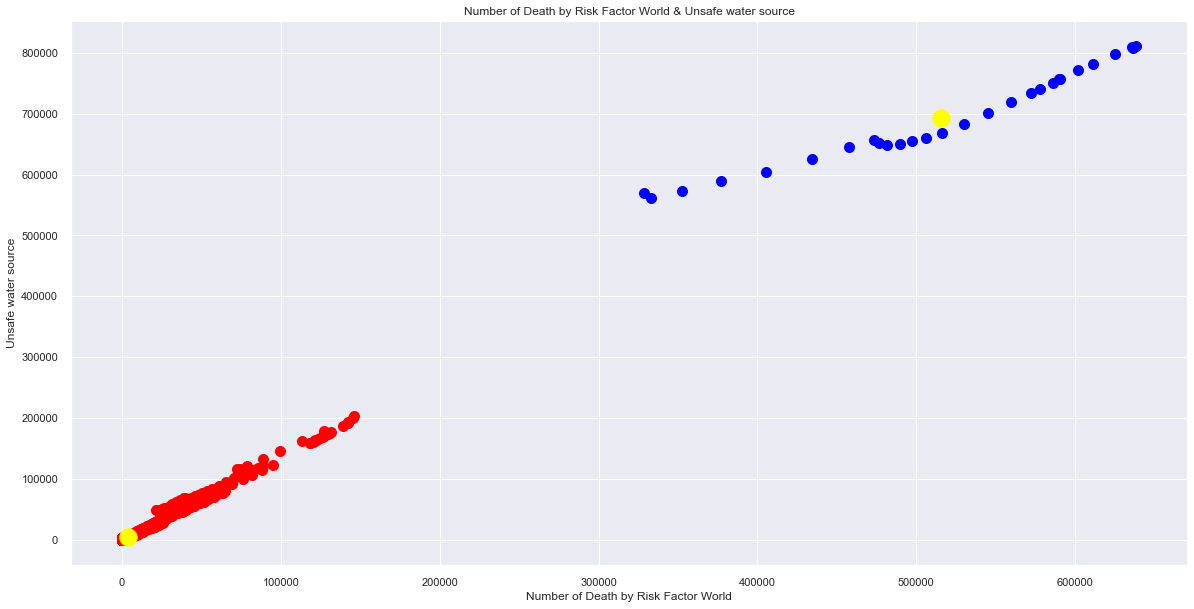

In [959]:
#Generates Clustering graph
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Number of Death by Risk Factor World & Unsafe water source')
plt.xlabel('Number of Death by Risk Factor World')
plt.ylabel('Unsafe water source')
plt.show()

In [101]:
df2.shape

(1244, 13)

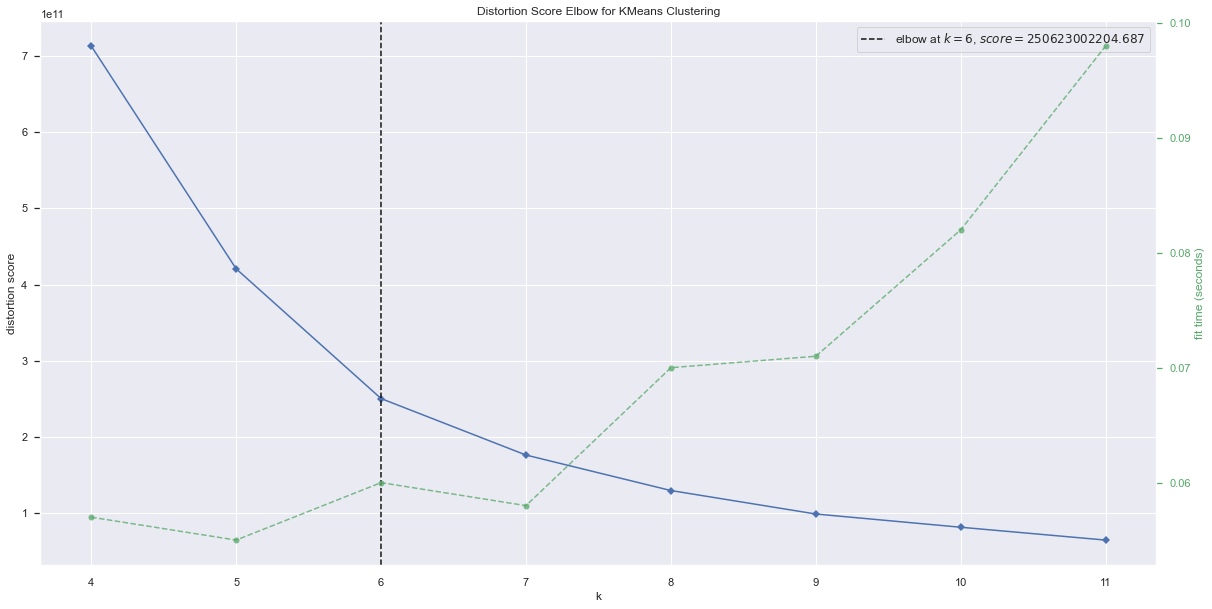

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [942]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clusters
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Use actual dataset df2
x1=df2['Poor sanitation']
x2= df2['Unsafe water source']
x3= df2.iloc[:,:7]
x4=df2.iloc[:,7:12]
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
#X = np.array(list(zip(x3,x4))).reshape(len(x3), 4)


#Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

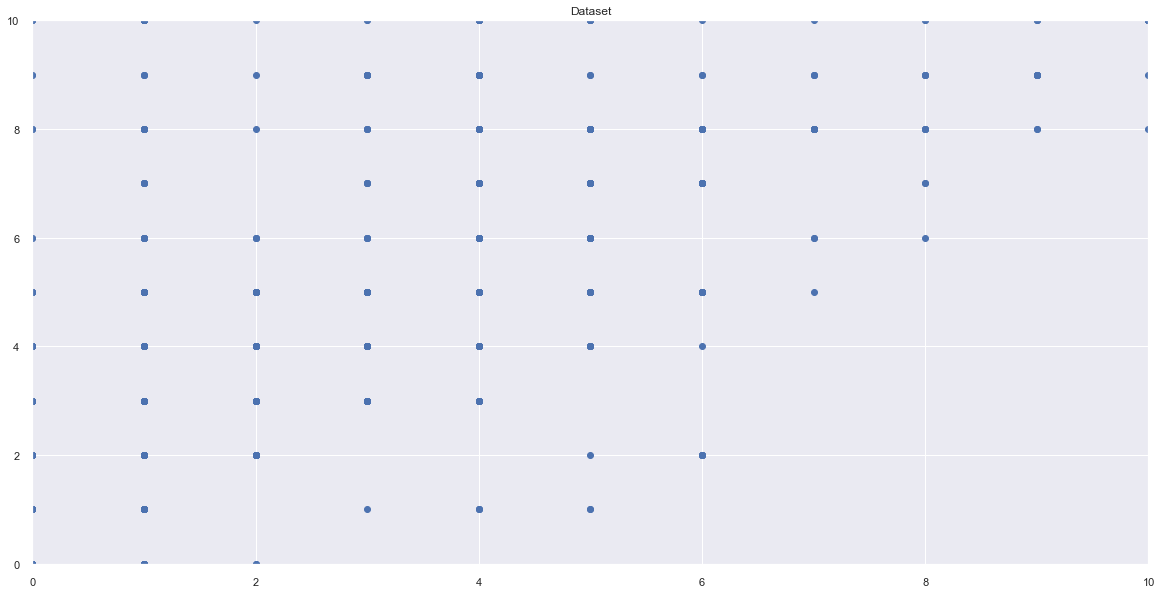

In [943]:
# Generate dataset from the two columns in the data set or df2

x1=df2['Poor sanitation']
x2= df2['Unsafe water source']
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
    
# Visualizing the data
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()



In [944]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [945]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 17036.599819471387
2 : 9598.87980001739
3 : 6672.418146727482
4 : 5399.406192672894
5 : 5133.798838438463
6 : 2878.175453837334
7 : 2752.8486182848105
8 : 2583.4179598998835
9 : 1886.8452462074679


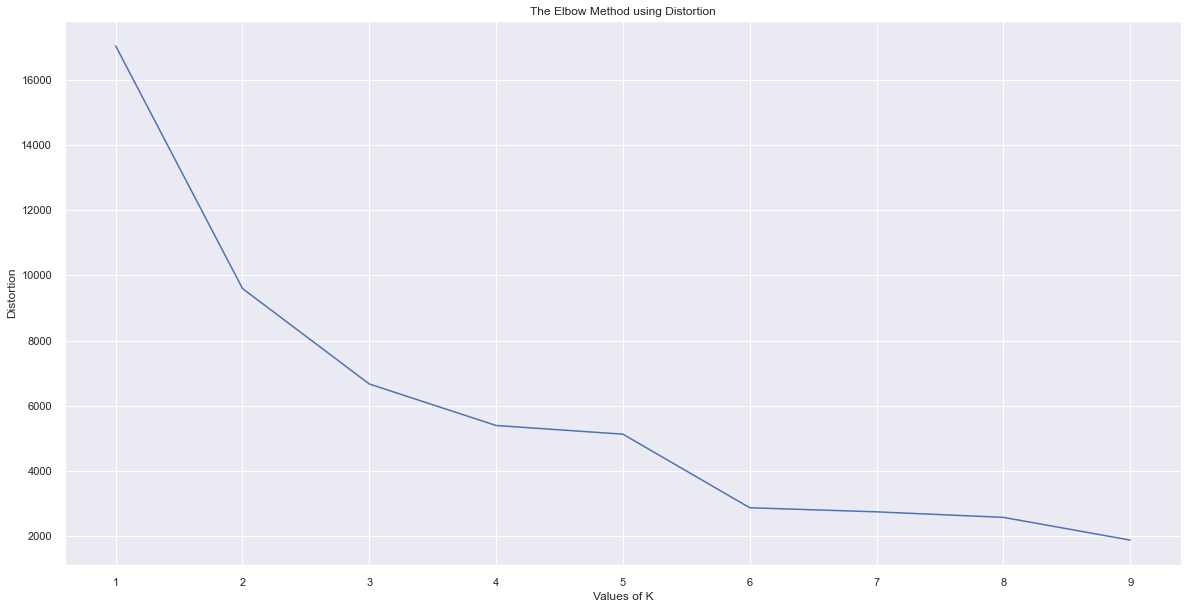

In [946]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()